In [1]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
train_data = pd.read_excel(r'/Users/abhijayhazarika/Desktop/Machine Learing Project/au-ece-cvml2022/Train_data.xls')
test_data = pd.read_excel(r'/Users/abhijayhazarika/Desktop/Machine Learing Project/au-ece-cvml2022/Test_data.xls')

In [3]:
train_data.shape



(300, 25)

In [4]:
test_data.shape

(100, 24)

In [5]:
train_data.isna().isnull()

Number    Sex    Age  Tscore  Height  Weight    BMI  Cem_ucem    TKA  \
0     False  False  False   False   False   False  False     False  False   
1     False  False  False   False   False   False  False     False  False   
2     False  False  False   False   False   False  False     False  False   
3     False  False  False   False   False   False  False     False  False   
4     False  False  False   False   False   False  False     False  False   
..      ...    ...    ...     ...     ...     ...    ...       ...    ...   
295   False  False  False   False   False   False  False     False  False   
296   False  False  False   False   False   False  False     False  False   
297   False  False  False   False   False   False  False     False  False   
298   False  False  False   False   False   False  False     False  False   
299   False  False  False   False   False   False  False     False  False   

      side  ...  calciumion  creatinin   eGFR  oks_total  VAS_aktiv  exercise  \
0    False  ...       False      False  False      False      False     False   
1    False  ...       False      False  False      False      False     False   
2    False  ...       False      False  False      False      False     False   
3    False  ...       False      False  False      False      False     False   
4    False  ...       False      False  False      False      False     False   
..     ...  ...         ...        ...    ...        ...        ...       ...   
295  False  ...       False      False  False      False      False     False   
296  False  ...       False      False  False      False      False     False   
297  False  ...       False      False  False      False      False     False   
298  False  ...       False      False  False      False      False     False   
299  False  ...       False      False  False      False      False     False   

     former_alcoholabuse  smoker  former_smoker  MIG_group  
0                  False   False          False      False  
1                  False   False          False      False  
2                  False   False          False      False  
3                  False   False          False      False  
4                  False   False          False      False  
..                   ...     ...            ...        ...  
295                False   False          False      False  
296                False   False          False      False  
297                False   False          False      False  
298                False   False          False      False  
299                False   False          False      False  

[300 rows x 25 columns]

In [6]:
train_data.isna().sum()

Number                 0
Sex                    0
Age                    0
Tscore                 1
Height                 3
Weight                 3
BMI                    3
Cem_ucem               0
TKA                    0
side                   0
BASP                   7
PTHpmoll               1
Vitdnmoll              1
CTXmygl                7
P1NP                   7
calciumion             1
creatinin              0
eGFR                   0
oks_total              9
VAS_aktiv              9
exercise               9
former_alcoholabuse    9
smoker                 9
former_smoker          9
MIG_group              0
dtype: int64

In [7]:
test_data.isna().isnull()

Number    Sex    Age  Tscore  Height  Weight    BMI  Cem_ucem    TKA  \
0    False  False  False   False   False   False  False     False  False   
1    False  False  False   False   False   False  False     False  False   
2    False  False  False   False   False   False  False     False  False   
3    False  False  False   False   False   False  False     False  False   
4    False  False  False   False   False   False  False     False  False   
..     ...    ...    ...     ...     ...     ...    ...       ...    ...   
95   False  False  False   False   False   False  False     False  False   
96   False  False  False   False   False   False  False     False  False   
97   False  False  False   False   False   False  False     False  False   
98   False  False  False   False   False   False  False     False  False   
99   False  False  False   False   False   False  False     False  False   

     side  ...   P1NP  calciumion  creatinin   eGFR  oks_total  VAS_aktiv  \
0   False  ...  False       False      False  False      False      False   
1   False  ...  False       False      False  False      False      False   
2   False  ...  False       False      False  False      False      False   
3   False  ...  False       False      False  False      False      False   
4   False  ...  False       False      False  False      False      False   
..    ...  ...    ...         ...        ...    ...        ...        ...   
95  False  ...  False       False      False  False      False      False   
96  False  ...  False       False      False  False      False      False   
97  False  ...  False       False      False  False      False      False   
98  False  ...  False       False      False  False      False      False   
99  False  ...  False       False      False  False      False      False   

    exercise  former_alcoholabuse  smoker  former_smoker  
0      False                False   False          False  
1      False                False   False          False  
2      False                False   False          False  
3      False                False   False          False  
4      False                False   False          False  
..       ...                  ...     ...            ...  
95     False                False   False          False  
96     False                False   False          False  
97     False                False   False          False  
98     False                False   False          False  
99     False                False   False          False  

[100 rows x 24 columns]

In [8]:
test_data.isna().sum()

Number                 0
Sex                    0
Age                    0
Tscore                 0
Height                 0
Weight                 0
BMI                    0
Cem_ucem               0
TKA                    0
side                   0
BASP                   0
PTHpmoll               0
Vitdnmoll              0
CTXmygl                1
P1NP                   1
calciumion             0
creatinin              0
eGFR                   0
oks_total              0
VAS_aktiv              0
exercise               0
former_alcoholabuse    0
smoker                 0
former_smoker          0
dtype: int64

In [9]:
df = train_data

In [10]:
cat_variables = df[['Tscore', 'Height','BMI','BASP','PTHpmoll','Vitdnmoll','CTXmygl','P1NP','calciumion','oks_total','VAS_aktiv','exercise','former_alcoholabuse','smoker','former_smoker']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

Tscore  Height        BMI  BASP  PTHpmoll  Vitdnmoll  CTXmygl  P1NP  \
0    -2.3   175.0  28.408163  76.0      11.9       38.0     0.27  69.0   
1    -1.8   159.0  29.033663  66.0      10.6      116.0     0.37  63.0   
2    -0.3   158.5  41.278149  60.0       6.0       44.0     0.21  44.0   
3    -1.3   159.0  36.667850  74.0       8.8       70.0     0.19  29.0   
4     0.5   172.0  27.886696  78.0       4.1       54.0     0.20  28.0   

   calciumion  oks_total  VAS_aktiv  exercise  former_alcoholabuse  smoker  \
0        1.28       26.0       49.0       1.0                  0.0     0.0   
1        1.27       17.0       20.0       0.0                  0.0     1.0   
2        1.31       29.0       42.0       1.0                  0.0     0.0   
3        1.22       15.0       54.0       0.0                  0.0     0.0   
4        1.28       13.0       80.0       0.0                  0.0     0.0   

   former_smoker  
0            0.0  
1            1.0  
2            1.0  
3            0.0  
4            1.0

In [11]:
df = df.drop(['Tscore', 'Height','BMI','BASP','PTHpmoll','Vitdnmoll','CTXmygl','P1NP','calciumion','oks_total','VAS_aktiv','exercise','former_alcoholabuse','smoker','former_smoker'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

Number  Sex  Age      Weight  Cem_ucem  TKA  side  creatinin  eGFR  \
0       1    1   69   87.000000         1    1     1       82.0    81   
1       2    0   87   73.400002         1    1     0       87.0    53   
2       3    0   62  103.699997         1    1     1       57.0    90   
3       4    0   74   92.699997         1    1     1       79.0    62   
4       5    0   51   82.500000         1    0     0       52.0    90   

   MIG_group  ...  Vitdnmoll  CTXmygl  P1NP  calciumion  oks_total  VAS_aktiv  \
0          0  ...       38.0     0.27  69.0        1.28       26.0       49.0   
1          0  ...      116.0     0.37  63.0        1.27       17.0       20.0   
2          0  ...       44.0     0.21  44.0        1.31       29.0       42.0   
3          0  ...       70.0     0.19  29.0        1.22       15.0       54.0   
4          0  ...       54.0     0.20  28.0        1.28       13.0       80.0   

   exercise  former_alcoholabuse  smoker  former_smoker  
0       1.0                  0.0     0.0            0.0  
1       0.0                  0.0     1.0            1.0  
2       1.0                  0.0     0.0            1.0  
3       0.0                  0.0     0.0            0.0  
4       0.0                  0.0     0.0            1.0  

[5 rows x 25 columns]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

Number  Sex       Age    Weight  Cem_ucem  TKA  side  creatinin  \
0  0.000000  1.0  0.566038  0.395833       1.0  1.0   1.0   0.327227   
1  0.003344  0.0  0.905660  0.254167       1.0  1.0   0.0   0.347491   
2  0.006689  0.0  0.433962  0.569792       1.0  1.0   1.0   0.225906   
3  0.010033  0.0  0.660377  0.455208       1.0  1.0   1.0   0.315068   
4  0.013378  0.0  0.226415  0.348958       1.0  0.0   0.0   0.205642   

       eGFR  MIG_group  ...  Vitdnmoll   CTXmygl      P1NP  calciumion  \
0  0.865672        0.0  ...   0.150538  0.250000  0.253394    0.123967   
1  0.447761        0.0  ...   0.569892  0.354167  0.226244    0.115702   
2  1.000000        0.0  ...   0.182796  0.187500  0.140271    0.148760   
3  0.582090        0.0  ...   0.322581  0.166667  0.072398    0.074380   
4  1.000000        0.0  ...   0.236559  0.177083  0.067873    0.123967   

   oks_total  VAS_aktiv  exercise  former_alcoholabuse  smoker  former_smoker  
0   0.585366       0.49       1.0                  0.0     0.0            0.0  
1   0.365854       0.20       0.0                  0.0     1.0            1.0  
2   0.658537       0.42       1.0                  0.0     0.0            1.0  
3   0.317073       0.54       0.0                  0.0     0.0            0.0  
4   0.268293       0.80       0.0                  0.0     0.0            1.0  

[5 rows x 25 columns]

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [14]:
train_set = df

In [15]:
df = test_data

In [16]:
cat_variables = df[['CTXmygl','P1NP']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

CTXmygl  P1NP
0     0.64  69.0
1     0.12  13.0
2     0.12  29.0
3     0.26  36.0
4     0.24  29.0

In [17]:
df = df.drop(['CTXmygl','P1NP'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

Number  Sex  Age  Tscore  Height  Weight        BMI  Cem_ucem  TKA  side  \
0       1    0   70    -2.9   164.0    83.0  30.859608         0    1     1   
1       2    1   81    -2.1   168.0    54.5  19.309807         0    0     1   
2       3    1   67     0.3   174.0    75.0  24.772097         0    1     1   
3       4    1   84     0.0   178.0    80.0  25.249338         0    1     1   
4       5    1   77     2.2   180.0   105.0  32.407406         1    1     0   

   ...  creatinin  eGFR  oks_total  VAS_aktiv  exercise  former_alcoholabuse  \
0  ...         42    90         23         37         1                    0   
1  ...         76    81         29         80         1                    0   
2  ...         72    90         38         11         1                    0   
3  ...         94    64         30         17         1                    0   
4  ...         65    89         27         50         1                    0   

   smoker  former_smoker  CTXmygl  P1NP  
0       0              0     0.64  69.0  
1       0              0     0.12  13.0  
2       0              1     0.12  29.0  
3       0              1     0.26  36.0  
4       0              0     0.24  29.0  

[5 rows x 24 columns]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

Number  Sex       Age    Tscore    Height   Weight       BMI  Cem_ucem  \
0  0.000000  0.0  0.702128  0.121212  0.333333  0.41250  0.505333       0.0   
1  0.010101  1.0  0.936170  0.242424  0.428571  0.05625  0.000000       0.0   
2  0.020202  1.0  0.638298  0.606061  0.571429  0.31250  0.238989       0.0   
3  0.030303  1.0  1.000000  0.560606  0.666667  0.37500  0.259870       0.0   
4  0.040404  1.0  0.851064  0.893939  0.714286  0.68750  0.573053       1.0   

   TKA  side  ...  creatinin      eGFR  oks_total  VAS_aktiv  exercise  \
0  1.0   1.0  ...   0.000000  1.000000   0.500000   0.336842       1.0   
1  0.0   1.0  ...   0.309091  0.850000   0.676471   0.789474       1.0   
2  1.0   1.0  ...   0.272727  1.000000   0.941176   0.063158       1.0   
3  1.0   1.0  ...   0.472727  0.566667   0.705882   0.126316       1.0   
4  1.0   0.0  ...   0.209091  0.983333   0.617647   0.473684       1.0   

   former_alcoholabuse  smoker  former_smoker   CTXmygl      P1NP  
0                  0.0     0.0            0.0  0.921875  0.424242  
1                  0.0     0.0            0.0  0.109375  0.000000  
2                  0.0     0.0            1.0  0.109375  0.121212  
3                  0.0     0.0            1.0  0.328125  0.174242  
4                  0.0     0.0            0.0  0.296875  0.121212  

[5 rows x 24 columns]

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [20]:
test_set = df

In [21]:
test_set

Number  Sex       Age    Tscore    Height   Weight       BMI  Cem_ucem  \
0   0.000000  0.0  0.702128  0.121212  0.333333  0.41250  0.505333       0.0   
1   0.010101  1.0  0.936170  0.242424  0.428571  0.05625  0.000000       0.0   
2   0.020202  1.0  0.638298  0.606061  0.571429  0.31250  0.238989       0.0   
3   0.030303  1.0  1.000000  0.560606  0.666667  0.37500  0.259870       0.0   
4   0.040404  1.0  0.851064  0.893939  0.714286  0.68750  0.573053       1.0   
..       ...  ...       ...       ...       ...      ...       ...       ...   
95  0.959596  1.0  0.404255  0.484848  0.547619  0.40000  0.353887       0.0   
96  0.969697  0.0  0.680851  0.363636  0.523810  0.37500  0.338288       0.0   
97  0.979798  0.0  0.723404  0.196970  0.452381  0.31250  0.304070       0.0   
98  0.989899  1.0  0.617021  0.287879  0.523810  0.56250  0.560126       0.0   
99  1.000000  1.0  0.574468  0.439394  0.642857  0.41250  0.314284       0.0   

    TKA  side  ...  creatinin      eGFR  oks_total  VAS_aktiv  exercise  \
0   1.0   1.0  ...   0.000000  1.000000   0.500000   0.336842       1.0   
1   0.0   1.0  ...   0.309091  0.850000   0.676471   0.789474       1.0   
2   1.0   1.0  ...   0.272727  1.000000   0.941176   0.063158       1.0   
3   1.0   1.0  ...   0.472727  0.566667   0.705882   0.126316       1.0   
4   1.0   0.0  ...   0.209091  0.983333   0.617647   0.473684       1.0   
..  ...   ...  ...        ...       ...        ...        ...       ...   
95  1.0   0.0  ...   0.236364  1.000000   0.529412   0.421053       0.0   
96  1.0   1.0  ...   0.136364  1.000000   0.588235   0.526316       1.0   
97  0.0   1.0  ...   0.063636  1.000000   0.617647   0.694737       1.0   
98  1.0   1.0  ...   0.163636  1.000000   0.794118   0.673684       1.0   
99  0.0   1.0  ...   0.336364  1.000000   0.500000   0.463158       1.0   

    former_alcoholabuse  smoker  former_smoker   CTXmygl      P1NP  
0                   0.0     0.0            0.0  0.921875  0.424242  
1                   0.0     0.0            0.0  0.109375  0.000000  
2                   0.0     0.0            1.0  0.109375  0.121212  
3                   0.0     0.0            1.0  0.328125  0.174242  
4                   0.0     0.0            0.0  0.296875  0.121212  
..                  ...     ...            ...       ...       ...  
95                  0.0     0.0            1.0  0.140625  0.272727  
96                  0.0     0.0            0.0  0.171875  0.212121  
97                  0.0     0.0            1.0  0.203125  0.151515  
98                  1.0     0.0            1.0  0.265625  0.280303  
99                  0.0     0.0            1.0  0.640625  0.371212  

[100 rows x 24 columns]

In [22]:
train_set["MIG_group"].value_counts()

0.0    236
1.0     64
Name: MIG_group, dtype: int64

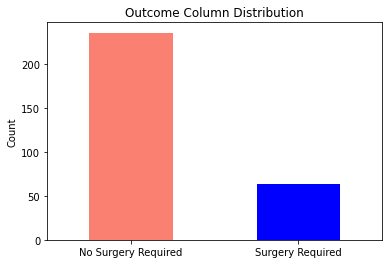

In [23]:
train_set["MIG_group"].value_counts().plot(kind="bar",color=["salmon","blue"])
plt.xticks(np.arange(2), ('No Surgery Required', 'Surgery Required'),rotation=0)
plt.title('Outcome Column Distribution')
plt.ylabel('Count')
plt.show()

In [24]:
test_set.isna().sum()

Number                 0
Sex                    0
Age                    0
Tscore                 0
Height                 0
Weight                 0
BMI                    0
Cem_ucem               0
TKA                    0
side                   0
BASP                   0
PTHpmoll               0
Vitdnmoll              0
calciumion             0
creatinin              0
eGFR                   0
oks_total              0
VAS_aktiv              0
exercise               0
former_alcoholabuse    0
smoker                 0
former_smoker          0
CTXmygl                0
P1NP                   0
dtype: int64

In [25]:
train_set.isna().sum()

Number                 0
Sex                    0
Age                    0
Weight                 0
Cem_ucem               0
TKA                    0
side                   0
creatinin              0
eGFR                   0
MIG_group              0
Tscore                 0
Height                 0
BMI                    0
BASP                   0
PTHpmoll               0
Vitdnmoll              0
CTXmygl                0
P1NP                   0
calciumion             0
oks_total              0
VAS_aktiv              0
exercise               0
former_alcoholabuse    0
smoker                 0
former_smoker          0
dtype: int64

In [26]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               300 non-null    float64
 1   Sex                  300 non-null    float64
 2   Age                  300 non-null    float64
 3   Weight               300 non-null    float64
 4   Cem_ucem             300 non-null    float64
 5   TKA                  300 non-null    float64
 6   side                 300 non-null    float64
 7   creatinin            300 non-null    float64
 8   eGFR                 300 non-null    float64
 9   MIG_group            300 non-null    float64
 10  Tscore               300 non-null    float64
 11  Height               300 non-null    float64
 12  BMI                  300 non-null    float64
 13  BASP                 300 non-null    float64
 14  PTHpmoll             300 non-null    float64
 15  Vitdnmoll            300 non-null    flo

In [27]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               100 non-null    float64
 1   Sex                  100 non-null    float64
 2   Age                  100 non-null    float64
 3   Tscore               100 non-null    float64
 4   Height               100 non-null    float64
 5   Weight               100 non-null    float64
 6   BMI                  100 non-null    float64
 7   Cem_ucem             100 non-null    float64
 8   TKA                  100 non-null    float64
 9   side                 100 non-null    float64
 10  BASP                 100 non-null    float64
 11  PTHpmoll             100 non-null    float64
 12  Vitdnmoll            100 non-null    float64
 13  calciumion           100 non-null    float64
 14  creatinin            100 non-null    float64
 15  eGFR                 100 non-null    floa

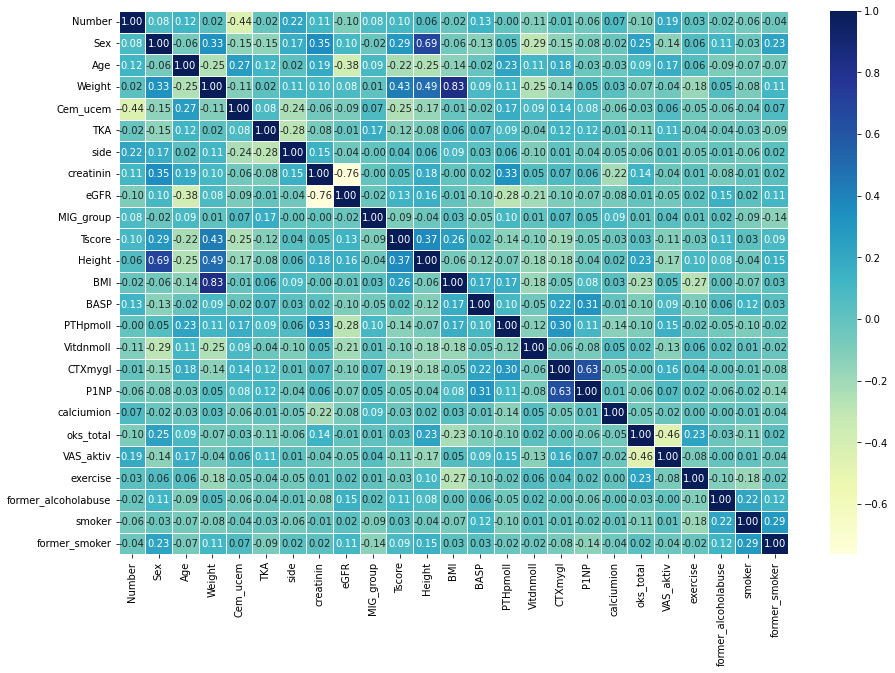

In [28]:
corr_matrix = train_set.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

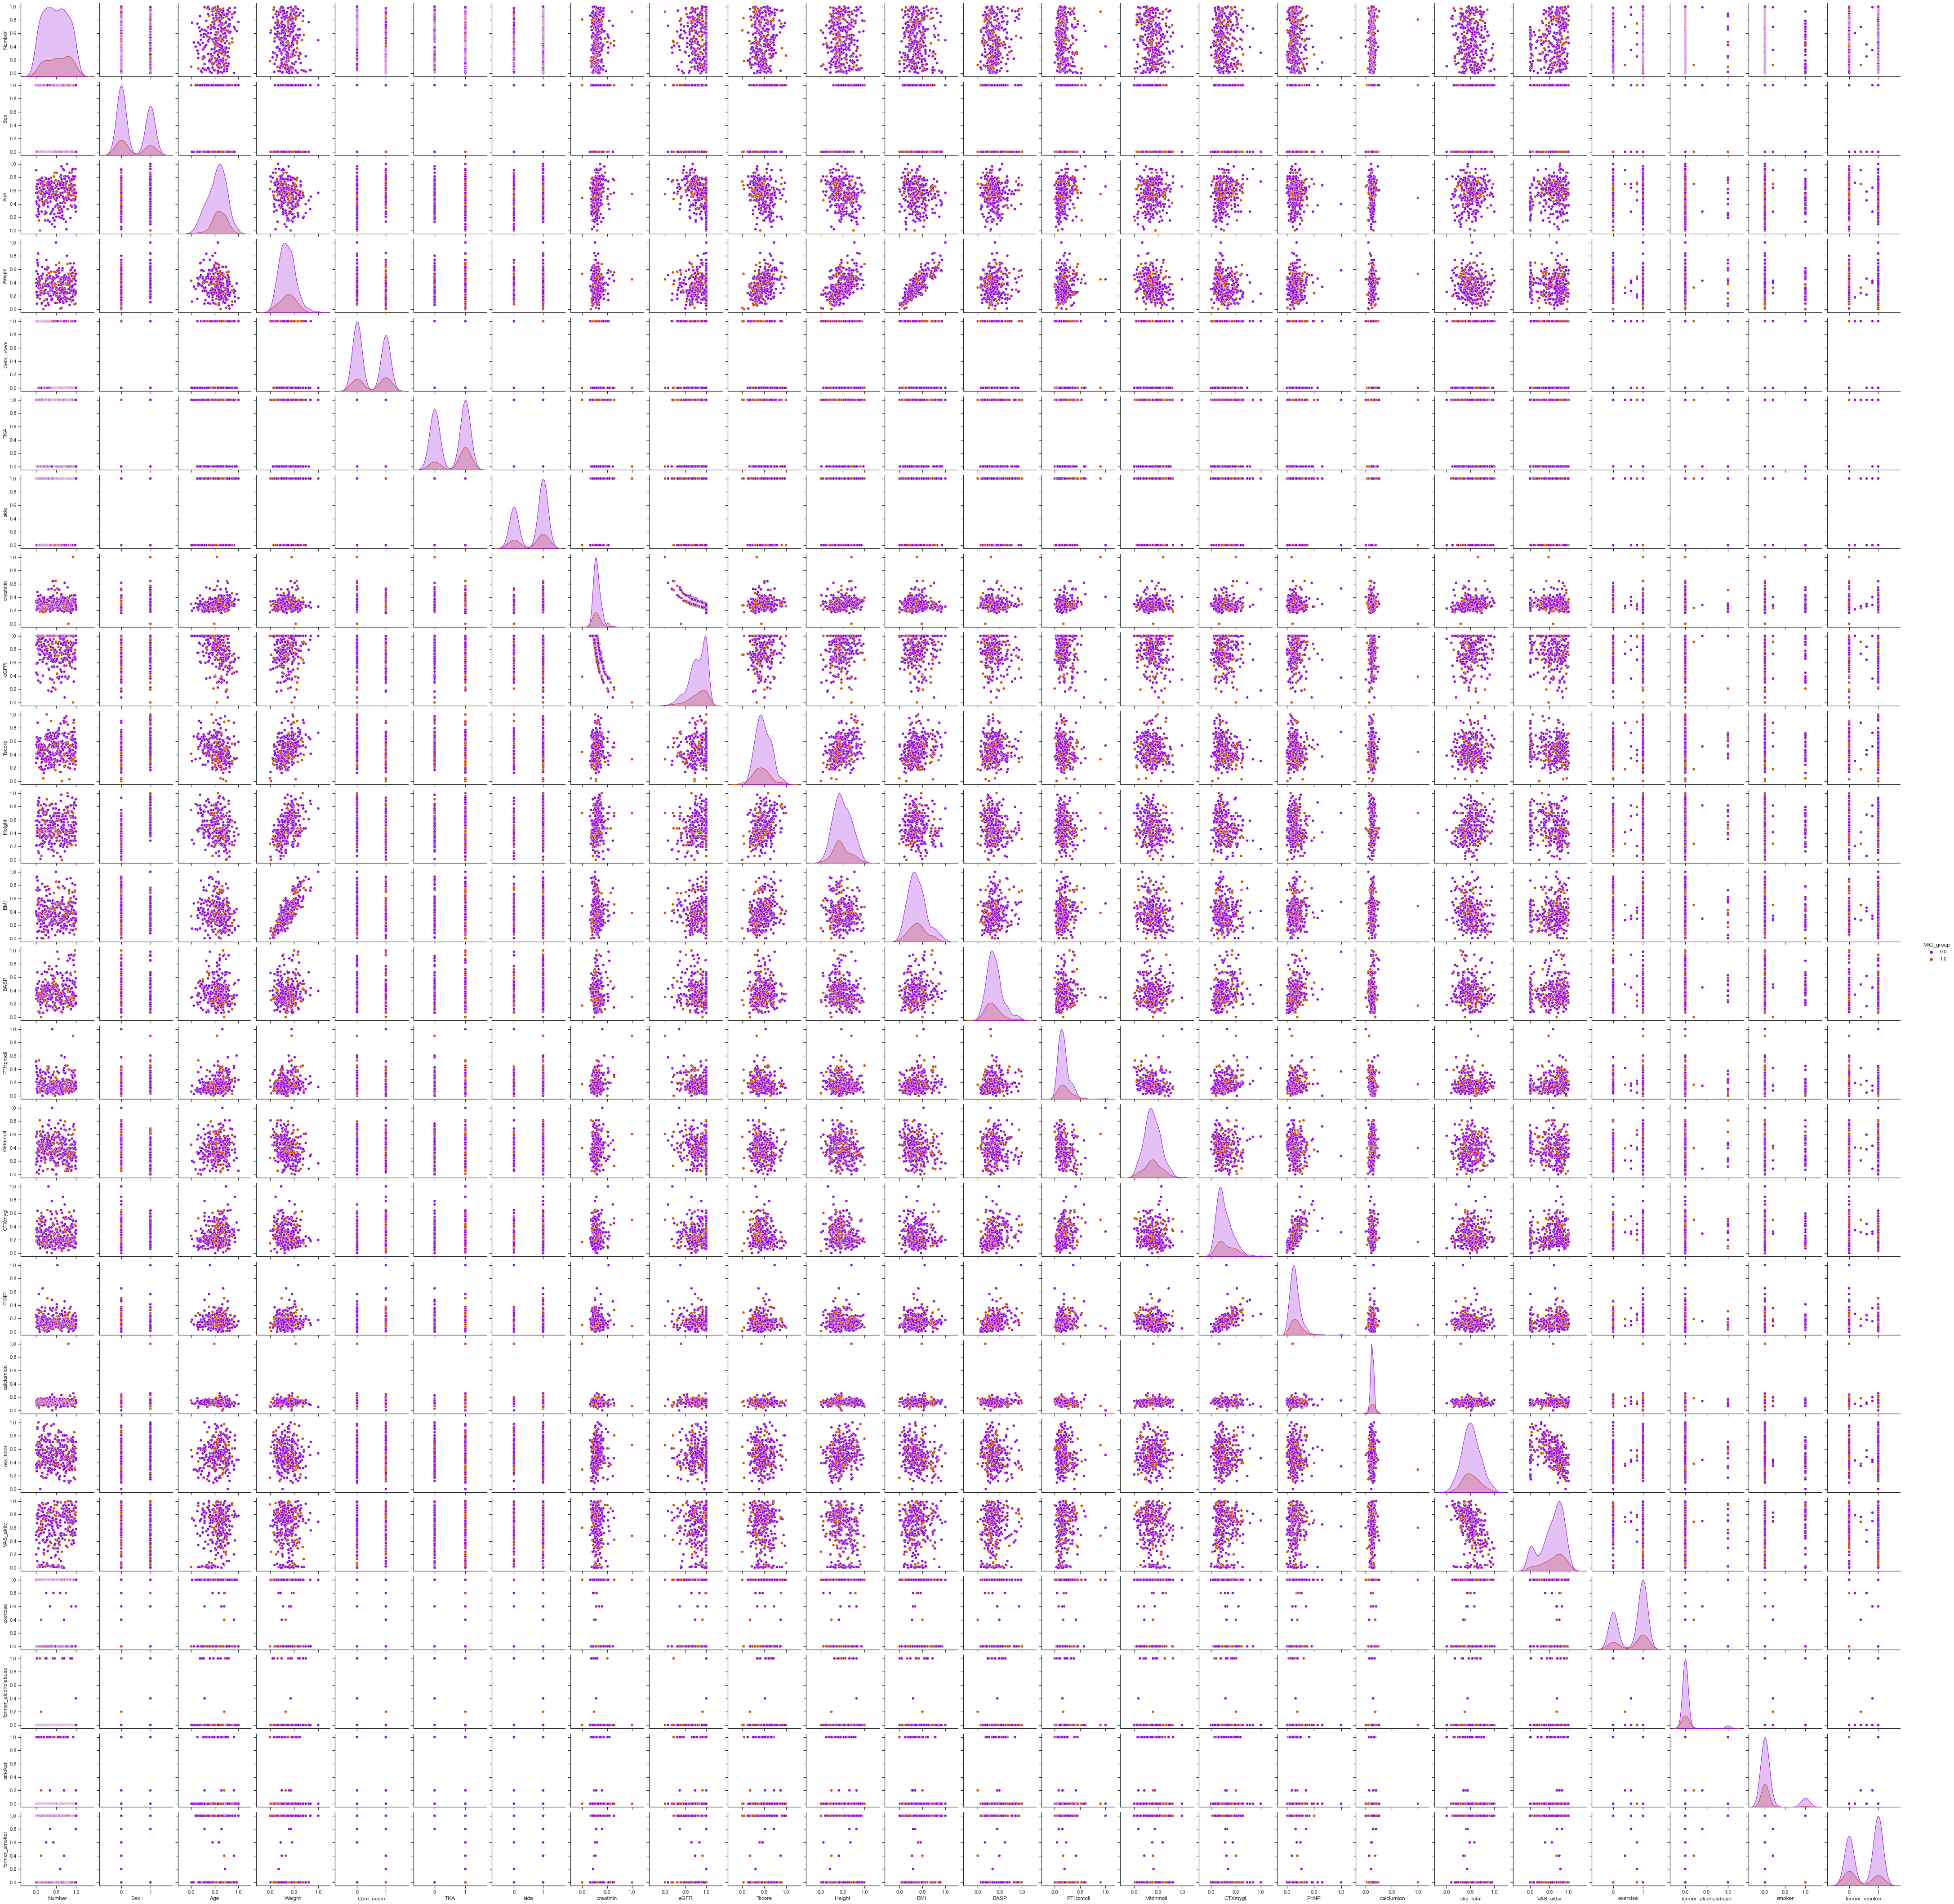

In [29]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(train_set,hue='MIG_group',palette='gnuplot').savefig("scatteplot.png");


In [30]:
X = train_set.drop("MIG_group", axis = 1)
y = train_set["MIG_group"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2) #0.3

In [31]:
(len(X_train),len(X_test))

(240, 60)

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)
print(y_train)
## Evaluating the model
preds = log_reg.predict(X_test)
log_reg = log_reg.score(X_test,y_test)
print(preds)
np.unique(y_test.values, return_counts=True)

232    0.0
59     1.0
6      0.0
185    0.0
173    0.0
      ... 
188    0.0
71     0.0
106    0.0
270    0.0
102    0.0
Name: MIG_group, Length: 240, dtype: float64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(array([0., 1.]), array([48, 12]))

In [33]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [34]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [35]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [36]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

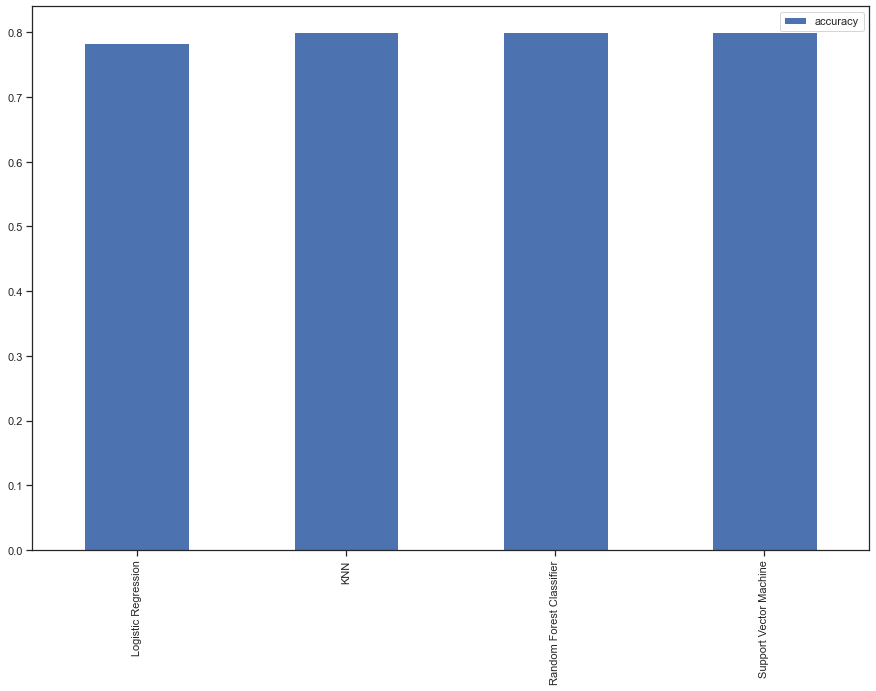

In [37]:
model_compare.T.plot.bar(figsize=(15,10));

In [38]:
model_compare

Logistic Regression  KNN  Random Forest Classifier  \
accuracy             0.783333  0.8                       0.8   

          Support Vector Machine  
accuracy                     0.8

In [39]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [40]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
score = rs_log_reg.score(X_test,y_test)
score

0.8

In [42]:
score = rs_log_reg.score(X_test,y_test)
score

0.8

In [43]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log_reg.score(X_test,y_test)

0.8

In [45]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

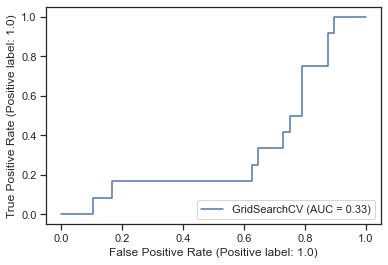

In [46]:
# plot ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [47]:
print(confusion_matrix(y_test,y_preds))

[[48  0]
 [12  0]]


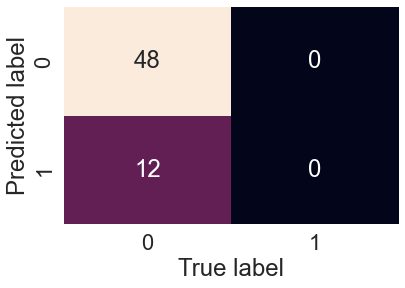

In [48]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        48
         1.0       0.00      0.00      0.00        12

    accuracy                           0.80        60
   macro avg       0.40      0.50      0.44        60
weighted avg       0.64      0.80      0.71        60



In [50]:
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [51]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [52]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.76666667, 0.76666667, 0.76666667, 0.76666667])

In [53]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7866666666666667

In [54]:
import pickle 

In [55]:
pickle.dump(gs_log_reg, open("Knee_Surgery.pk1", "wb"))

In [56]:
loaded_model = pickle.load(open("Knee_Surgery.pk1","rb"))

In [57]:
loaded_model.predict(test_set)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
new_array = loaded_model.predict(test_set)

In [59]:
print(new_array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [60]:
df = pd.DataFrame(new_array,columns=["Label"]).reset_index()
df.rename(columns={'index': 'ID'},inplace=True)
df['ID']= df['ID'] +1
df = df.astype({'Label':'int'})



In [61]:
df.to_csv("Predict.csv",index=False)
